# Problem 1 
In many areas of data science and machine learning we need to produce random samples in different ways. This can be done to compute difficult integrals or validate algorithms. In this problem you will be asked to basically 

1. Implement a pseudo number generator that produces random numbers from the uniform distribution $[0,1]$.
2. Use that to construct samples from 
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \sin(x), & 0 < x < \pi/2 \\
        1, & x \geq \pi/2
    \end{cases}
$$
3. Consider a random variable $X \sim F$ sampled from distribution $F$, and use your sampler to estimate $E[X]$ using $1000$ samples.
4. Use the bootstrap method to produce a bootstrap confidence interval for $E[X]$ of $95\%$ from your $1000$ samples above. How do you produce the bootstrap samples from your uniform sampler in step 1?

In [4]:

import numpy as np
import math
from numpy.random import seed
from numpy import random
from numpy.random import normal
from numpy import mean
from numpy import median
from numpy import percentile
from scipy.stats import norm 
from pylab import cumsum
# seed the random number generator
seed(1)


def uniformCDF(x, theta1, theta2):
    '''Uniform(theta1, theta2) CDF or DF function F(x; theta1, theta2).
    
    x is the value to evaluate the cdf at.
    theta1, theta2 are the distribution parameters.'''
    
    retvalue = 0 # default return value
    if (x > theta2):
        retvalue = 1
    elif (x > theta1): # else-if
        retvalue =  (x - theta1) / (theta2-theta1)   
    # if (x < theta1), retvalue will be 0
    return retvalue

def sample_distribution(theta1, theta2):
    #uniform random sample
    us = [random.random()]
    
    return [uniformCDF(np.sin(u), theta1, theta2) for u in us]



In [66]:
x = [sample_distribution(0,np.pi/2) for i in range(1000)]


In [ ]:
def makeEDFHidden(myDataList, offset=0):
    '''Make an empirical distribution function from a data list.
    
    Param myDataList, list of data to make ecdf from.
    Param offset is an offset to adjust the edf by, used for doing confidence bands.
    Return list of tuples comprising (data value, cumulative relative frequency) ordered by data value.'''
    
    sortedUniqueValues = sorted(list(set(myDataList)))
    freqs = [myDataList.count(i) for i in sortedUniqueValues]
    from pylab import cumsum
    cumFreqs = list(cumsum(freqs)) #
    cumRelFreqs = [ZZ(i)/len(myDataList) for i in cumFreqs] # get cumulative relative frequencies as rationals
    if offset > 0: # an upper band
        cumRelFreqs = [min(i ,1) for i in cumRelFreqs] # use a list comprehension
    if offset < 0: # a lower band
        cumRelFreqs = [max(i, 0) for i in cumFreqs] # use a list comprehension
    print(list(zip(sortedUniqueValues, cumRelFreqs)))


def ecdfPlot(samples):
    '''Returns an empirical probability mass function plot from samples data.'''
    ecdf_pairs = makeEDFHidden(samples)
    ecdf = point(ecdf_pairs, rgbcolor = "red", faceted = false, pointsize="20")
    for k in range(len(ecdf_pairs)):
        x, kheight = ecdf_pairs[k]     # unpack tuple
        previous_x = 0
        previous_height = 0
        if k > 0:
            previous_x, previous_height = ecdf_pairs[k-1] # unpack previous tuple
        ecdf += line([(previous_x, previous_height),(x, previous_height)], rgbcolor="grey")
        ecdf += points((x, previous_height),rgbcolor = "white", faceted = true, pointsize="20")
        ecdf += line([(x, previous_height),(x, kheight)], rgbcolor="grey", linestyle=":")
    # padding
    ecdf += line([(ecdf_pairs[0][0]-0.2, 0),(ecdf_pairs[0][0], 0)], rgbcolor="grey")
    max_index = len(ecdf_pairs)-1
    ecdf += line([(ecdf_pairs[max_index][0], ecdf_pairs[max_index][1]),(ecdf_pairs[max_index][0]+0.2, ecdf_pairs[max_index][1])],rgbcolor="grey")
    return ecdf

In [ ]:
ecdfPlot(x)


## Problem 1.1

Run the above code cell to have the tools available to plot empirical distributions. Then fill in the code needed to solve the problem in the two functions
* `uniform_pseudo_random(n_samples)` to generate a list of length `n_samples` of random numbers in the interval $(0,1)$. You can test your result using the ecdfPlot.

In [1]:
def uniform_pseudo_random(n_samples):
    # Implement a pseudo number generator, you are free to choose any
    # as long as you implement it yourself and dont use the packages.
    r = np.random.uniform(0, 1, n_samples).tolist()
#     urs = [random.random() for i in range(0,n_samples)]
    return r # A list of numbers of length n_samples

## Problem 1.2

After having implemented the above you can use that to produce samples from $F$ in the description of the problem. Again compare the empirical distribution with the true distribution as a sanity check.

In [5]:
def sampler_problem_1(n_samples):
    
     urs = uniform_pseudo_random(n_samples)
    
     return [uniformCDF(np.sin(u), 0,np.pi/2) for u in urs] # A list of numbers of length n_samples



## Problem 1.3
In the below, put the code in to compute an estimate of $E[X]$ using `sampler_problem_1` using $1000$ samples.

In [9]:
# Replace ??? below with the code necessary for the problem

# Since you are going to use the samples again, you can store them in
# the samples variable

#samples from X~F
samples = sampler_problem_1(1000)

def u_means(n):
    '''Function to give a list of n running means from uniform(theta1, theta2).
    
    n is the number of running means to generate.
    theta1, theta2 are the uniform distribution parameters.
    return a list of n running means.'''
    
    #get the sample size
    samplesizes = list(range(1, len(samples)+1,1))
    
    from pylab import cumsum
    csSample = list(cumsum(samples))
    samplesizes = range(1, n+1,1)
    return [csSample[i]/samplesizes[i] for i in range(n)]


# Use the samples variable and compute an estimate of E[X]
# In probability, the average value of some random variable X is called the expected value or the expectation.
# E_X = [np.mean(s) for s in samples]
# E_X = u_means(1000)
E_X = [np.mean(samples)]
E_X

[0.29544599044729286]

## Problem 1.4
As you might have noticed, I like the bootstrap. 
Now its time for you to produce a bootstrap confidence interval around $E[X]$ above, put the code in the cell below. You are basically free to write whatever code you like to solve the problem, one hint would be to use the code from the lectures, but it needs to be modified to use your sampler from problem 1.1.

### method one calculating confidence intervals

0.009076666595640598
0.009083534360075501


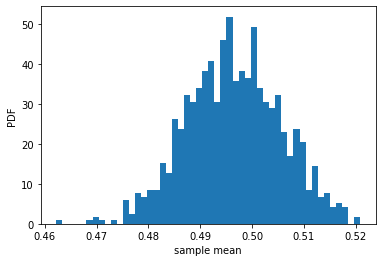

In [10]:
data = uniform_pseudo_random(1000)

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    #resampled array of the data
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

# Take 1000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(data, np.mean, size=1000)

# Compute and print SEM(standard error of the mean)
sem = np.std(data) / np.sqrt(len(data))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

import matplotlib.pyplot as plt
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('sample mean')
_ = plt.ylabel('PDF')

In [11]:
   #If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval
#     compute 95% confident interval
ci =np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', ci)



95% confidence interval = [0.4786266  0.51394861]


# Problem 2 
Let $X_1,\ldots,X_n \sim N(\theta,1)$. Define
$$
    Y_i = 
    \begin{cases}
        1, & X_i > 0 \\
        0, & X_i \leq 0
    \end{cases}
$$
Let $\psi = \mathbb{P}(Y_1 = 1)$.
* Find the maximum likelihood estimator $\hat \psi$ of $\psi$.
* Find an appropriate $95\%$ confidence interval for $\psi$.
* Repeat the above two steps with the variance unknown!

## Problem 2.1
Compute the maximum likelihood of $\psi$ and implement the function below

In [34]:

from scipy import optimize

def gaussian(x, mu, sig):
    return 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)


    
def mle_psi_problem_2(data):
    # Do whatever you need here to produce the MLE of the data
    x = np.array(data)
   
    
    #get loglikelihood
    def negloglike(parameters):
        mu = parameters[0]
        sigma = parameters[1]
        #     L     = n/2.0 * np.log(2 * np.pi) + n/2.0 * math.log(sigma **2 ) + 1/(2*sigma**2) * sum([(x_ - mu)**2 for x_ in x ])
        term1 = float(1.0/sigma*np.sqrt(2.0*np.pi))
        term2 =float(-1.0/(2.0*sigma**2))
        negLogLikl = -np.sum(np.log(term1*np.exp(term2*(x - mu)**2)))

        return negLogLikl
 
    
    parameter_bounding_box=((-100.0,100.0),(0.5,5.0)) # specify the constraints for each parameter - some guess work...
    initial_arguments = np.array([0.0, 1.0]) # point in 2D to initialise the minimize algorithm
    mle_result = optimize.minimize(negloglike, initial_arguments, bounds=parameter_bounding_box) 
    # call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
    
    return mle_result




# mu =result_Ass3Prob4['x'][0]
# sigma =result_Ass3Prob4['x'][1]

# def gaussian(x, mu, sig):
#     return 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

# import matplotlib.pyplot as plt
# x = np.arange(1,20, 0.1)
# y= gaussian(x, mu, sigma)
# plt.plot(x, gaussian(x, mu, sigma), label = 'fit')
# plt.plot(x, y, label = 'data')
# plt.legend()


## Problem 2.2
Use the below sample data to compute the MLE of $\psi$ and compute the corresponding $95\%$ confidence interval for $\psi$.

In [1]:
prob2_samples = [ 0.88, -0.75, -0.46, -0.13,  0.96,  0.17,  1.24, -1.03, -1.  , 1.7 ,  0.34,  1.01,  0.75,  0.58,  0.5 , -1.2 , -1.45,  1.59, 1.79, -1.32]

In [36]:
mle_psi = mle_psi_problem_2(prob2_samples)

sampleMean = mle_psi['x'][0]
sigma = mle_psi['x'][1]

# The left edge of the confidence interval
n=len(prob2_samples)
correction=float(2/(np.sqrt(n)*sampleMean)) # you can also replace RR by float here or you get expressions

low_edge_confidence = 1.0/sampleMean - correction
# The right edge of the condidence interval
high_edge_confidence = 1.0/sampleMean + correction

print(f'lower 95CI is: {low_edge_confidence}')
print(f'upper 95CI is: {high_edge_confidence}')

lower 95CI is: 2.6512541307743156
upper 95CI is: 6.941073427180717


## Problem 2.3
Compute the maximum likelihood of $\psi$ when the variance is unknown.

In [ ]:
def mle_psi_problem_2_uv(data):
    # Do whatever you need here to produce the MLE of the data
    return XXX #The MLE of psi above

Use the samples from the above data to compute the MLE of $\psi$ and compute the corresponding $95\%$ confidence interval for $\psi$.

In [ ]:
mle_psi_uv = mle_psi_problem_2_uv(prob2_samples)
# The left edge of the confidence interval
low_edge_confidence_uv = ??
# The right edge of the condidence interval
high_edge_confidence_uv = ??

# Problem 3 
The Gaussian Annulus theorem tells us that the spherical Gaussian distribution in $d$ dimensions concentrates in a spherical shell of radius $\sqrt{d}$.
1. Generate $1000$ samples of a spherical Gaussian for dimensions $d=10,20,...,100$ and for each $d$ estimate
$$
    P(\sqrt{d}-1 < |X| < \sqrt{d}+1)
$$
show your result as a plot with the $x$ axis being $d$ and the y axis being the probability. Did you get what you expected?
2. In the statement of the Gaussian annulus theorem (Theorem 2.9 in the book) there is an unknown constant $c$, based on the above simulation what would your guess for the value $c$ be?
3. Generate $1000$ pairs of vectors from a spherical Gaussian for dimensions $d=2$ and $d=20$, $d=200$, $d=2000$ and for each $d$ compute the angle between the pairs, using these angles, produce a histogram of the angles for each $d$. Hint. It is enough use the proper dot-product and `arccos`. What conclusion can you make about the angles as a function of dimension?
4. Revisiting step 1, can you, using simulation in the case $d=100$ find $\beta$ such that
$$
    P(\sqrt{d}-\beta < |x| < \sqrt{d}+\beta) \approx 0.99 ?
$$
Hint: is it possible to bootstrap?

## Problem 3.1
Put your code in the box below for part 1.

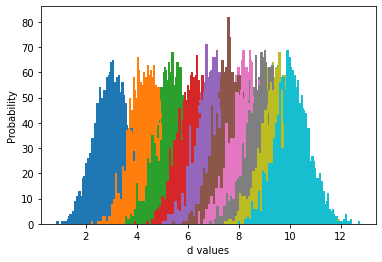

In [49]:


dim =[10,20,30,40,50,60,70,80,90,100]

def gen_samples(d,n_samples = 1000):
    
    dGaussian = np.random.normal(size=(n_samples,d))
    dGaussianNorm = np.linalg.norm(dGaussian,axis=1)

    return dGaussianNorm



    
for _ in range(len(dim)):
    
    for d in dim:
        dGaussianNorm = gen_samples(d)
        import matplotlib.pyplot as plt
        # Make a histogram of the results
        _ = plt.hist(dGaussianNorm, bins=50, density=False)
        _ = plt.xlabel('d values')
        _ = plt.ylabel('Probability')
        
   


## Problem 3.2
Write the answer and a motivation in the cell below

In [ ]:
# The reason I guess the value of c below is...
c = ??

## Problem 3.3
Put your code in the box below for part 3

In [22]:
import numpy as np
d =2
# XY = np.random.normal(size=(1000,d)) # Spherical Gaussian with unit variance in each coordinate in R^2

# XY = XY / np.linalg.norm(XY,axis=1).reshape(-1,1) # Make all vector unit length

# r = np.random.uniform(size=(XY.shape[0],1)) # Sample the radii uniformly from [0,1]
# uniform_ball = np.sqrt(r)*XY # Consider the correctly scaled radius
# uniform_ball


u = np.random.normal(size=(1000,d))
v = np.random.normal(size=(1000,d))
theta = 2 * np.pi * u
phi = np.arccos(2*v-1)
x   = np.sin(theta)*np.cos(phi)
y   = np.sin(theta)*np.sin(phi)
z   = np.cos (theta)
phi.shape


/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


(1000, 2)

## Problem 3.4
Put your code below for part 4

In [ ]:
###



beta = ??

# Problem 4 
In the exam assignment, there is a csv file called `digits.csv`.
1. Download the file and load it such that the digits are stored in a numpy array and the labels in another. The digits are 8x8 bitmaps so flattened it should be a numpy array of shape 1797x64
2. We wish first to perform PCA on this dataset using 2 components. Your task is to first implement PCA using SVD (you can use numpy for that) and then apply it to this dataset.
3. Compute the explained variance for the first two components
4. Apply a suitable model for predicting the label based on the two pca components.
5. What happens if you perform a random projection of the full dataset into $\mathbb{R}^2$ and then repeat the previous prediction model? Can you explain the result?

(1797, 64)
(1797,)


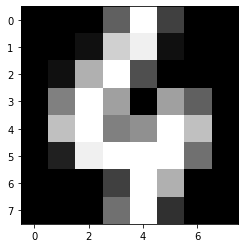

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
from scipy.stats import zscore


import sklearn
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


# Do all steps in the cell below, I only provided some skeletons but you have to do the rest
def load_digits(file_name):
    
     #read data as csv file
    df = pd.read_csv(file_name)
    
#      labels = np.array(df.columns)
    digits =[]
    labels= [] #targets
    
    for index, row in df.iterrows():
        digits.append([float(x) for x in row[:-1]])
        labels.append(int(row[-1])) 
       
        
    return (np.array(digits),np.array(labels)) # Returns a tuple of numpy arrays one has shape 1797x64 and the other has shape (1797,)
    
#     #initialize

X,Y =load_digits('digits.csv')
print(X.shape)
print(Y.shape)


def plot_digit(digit):
    # Takes a numpy array of shape (64,) and outputs plots the image as an 8x8 bitmap
    assert digit.shape == (64,)
    import matplotlib.pyplot as plt
    plt.gray()
    plt.imshow(digit.reshape(8,8))

plot_digit(X[64,:])


# perform pca with n=2 components
def perform_pca(n=2):
    
    #scale data based on standardscaler std=1, mean=0
    scaler =  StandardScaler().fit(X)
    
    scaled_data = scaler.transform(X)
    
    
    #perform pca
    pca = decomposition.PCA(n_components=n)
    digit_pca = pca.fit_transform(scaled_data)
    
    # get explained variance
    e_var = pca.explained_variance_ratio_
    #get cumulative variance 
    cum_var = pca.explained_variance_ratio_.sum()
    
    print("Cumulative Variance ", cum_var)

    #compute and retrieve scores
    scores = pca.transform(scaled_data)

   
    scores_df = pd.DataFrame(scores,columns=['PC1','PC2'])

    #retrieve loading values
    loadings = pca.components_.T
    
    df_loadings = pd.DataFrame(loadings,columns=['PC1','PC2'])
    
    
    return (df_loadings,scores_df,e_var,cum_var,digit_pca)


In [5]:
df_loadings, scores_df,var_exp,cum_var,digit_pca = perform_pca(n=2)

Cumulative Variance  0.21594970409620912


In [6]:
df_loadings

,PC1,PC2
0,-7.940910e-18,-4.731556e-18
1,-1.822341e-01,4.703536e-02
2,-2.858681e-01,5.957725e-02
3,-2.203696e-01,-2.079743e-02
4,2.516996e-02,1.558911e-01
...,...,...
59,-1.944491e-01,-9.900647e-03
60,-1.777358e-02,-2.519383e-01
61,-1.031979e-01,-2.426287e-01
62,-1.198107e-01,-1.650902e-01


In [7]:
#how much info is compressed in first few components
var_exp

array([0.12033916, 0.09561054])

In [8]:
cumulative_var =np.cumsum(np.round(var_exp,decimals=3))
cumulative_var

array([0.12 , 0.216])

In [9]:
#what %tage of data should i keep
cum_var

0.21594970409620912

In [10]:
scores_df

,PC1,PC2
0,1.914213,-0.954480
1,0.588981,0.924601
2,1.302040,-0.317353
3,-3.020770,-0.868711
4,4.528947,-1.093349
...,...,...
1792,0.104330,0.254997
1793,2.423235,-1.429632
1794,1.022598,-0.147991
1795,1.076055,-0.380921


Text(0, 0.5, 'PC2')

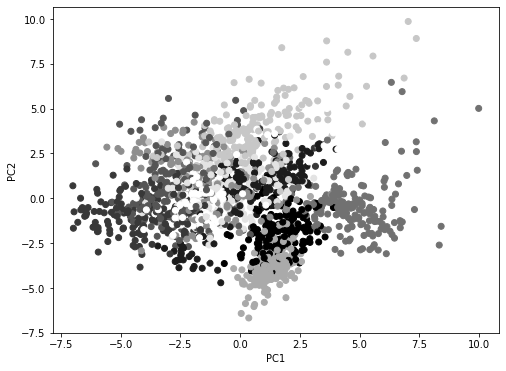

In [33]:
plt.figure(figsize=(8 , 6))
plt.scatter(digit_pca[:,0],digit_pca[:,1],c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [34]:
#build a classifier

def knn_distances(xTrain,xTest,k):
    """
    Finds the k nearest neighbors of xTest in xTrain.
    Input:
    xTrain = n x d matrix. n=rows and d=features
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    dists = distances between all xTrain and all XTest points. Size of n x m
    indices = k x m matrix with the indices of the yTrain labels that represent the point
    """
    #the following formula calculates the Euclidean distances.
    import numpy as np
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]
    #because of float precision, some small numbers can become negatives. Need to be replace with 0.
    distances[distances < 0] = 0
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k,:], distances[0:k,:]

def knn_predictions(xTrain,yTrain,xTest=None,k=3):
    """
    Uses xTrain and yTrain to predict xTest.
    Input:
    xTrain = n x d matrix. n=rows and d=features
    yTrain = n x 1 array. n=rows with label value
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    predictions = predicted labels, ie preds(i) is the predicted label of xTest(i,:)
    """
    import numpy as np
    if (xTest == None):
        xTest = xTrain
        
    indices, distances = knn_distances(xTrain,xTest,k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

def score(prediction,true_values):
    return np.sum(prediction == true_values)/len(prediction)


In [36]:
score(knn_predictions(X,Y,k=5),Y)

0.991652754590985

In [35]:
clf = LogisticRegression(random_state=0).fit(X, Y)
clf.score(X, Y)

/home/gilo/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X, Y)

#Predict the response for test dataset
y_pred = knn.predict(X)
y_pred

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y, y_pred))

 #### Perform PCA with custom method


In [16]:
#make a projection into R^2
class PCAs(object):

    def __init__(self,n_components):
        self.n_components =  n_components
        self.components=None
        self.singular_values=None
        self.dimension=None
        self.mean=None

    def fit(self,X):
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(min(X.shape[1],X.shape[0]) >= self.n_components), "min(X.shape[1],X.shape[0]) >= self.n_components!"
        print("Number of data_points: %d, number of features: %d, Number of components: %d" %(X.shape[0],X.shape[1],self.n_components))
        
        X = self._center(X) # Make sure the data is centered (each feature has empirical mean zero)
        self.dimension=X.shape[1] # This is the dimension of the data
        self.components,self.singular_values = self._compute(X) # Compute the singular vectors
        
    def _center(self,X):
        self.mean = np.mean(X,axis=0).reshape(1,-1)
        return X-self.mean
        
    def transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.dimension), "Incorrect number of features!"
        
        return (X-self.mean)@self.components
    
    def inverse_transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.n_components), "Incorrect number of features!"
        
        return X@self.components.T+self.mean
    
    def project(self,X):
        return self.inverse_transform(self.transform(X))
        
    def _compute(self,X):
        U,D,VT = np.linalg.svd(X,full_matrices=False)
        return (VT.T)[:,:self.n_components],D

In [26]:
pca_digit = PCAs(n_components =2)

In [27]:
pca_digit.fit(X)

Number of data_points: 1797, number of features: 64, Number of components: 2


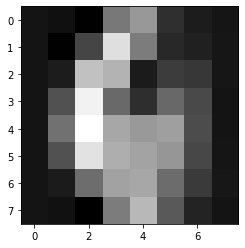

In [56]:
X_projected = pca_digit.project(X)

plot_digit(X_projected[64,:])

In [53]:
#compute the explained variance
#Explained variance is how much percentage of the total variance is captured by our singular vectors. 
#Remember the interpretation of the singular values as the standard deviation, as such the variance explained of the first  k  components is just the sum of the singular values squared and divided by the total variance.
variances = pca_digit.singular_values**2/(X.shape[0]-1)

ex_v =np.cumsum(variances/np.sum(variances))
ex_v

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [31]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_projected, Y)

#Predict the response for test dataset
y_predict = knn.predict(X_projected)


In [32]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y, y_predict))

Accuracy: 0.7206455203116305


In [37]:
score(knn_predictions(X_projected,Y,k=5),Y)

0.7790762381747357

In [ ]:
#on projection , the accuracy score drops to 77.9% compared to 99% score previously